# TP de IBD - Dota 2

# Table of Contents
1. [Diagrama entidade-relacionamento](#Diagrama-entidade-relacionamento)
2. [Esquema relacional](#Esquema-relacional)
3. [Dados](#Dados)
4. [Criação do banco de dados](#Criação-do-BD)

# Especificação

https://homepages.dcc.ufmg.br/~mirella/DCC011/aula19-TPfinal.pdf

### Cada grupo deverá escolher entre:
* ~~i.um conjunto de dados do portal http://dados.gov.br~~
* ✔️ ii.um conjunto de dados real que possa ser coletado da Web (e.g, twitter, imdb, github, dblp, etc)
* ~~iii.uma aplicação atual ou inovadora para a qual dados sintéticos possam ser gerados~~

### Itens a serem apresentados:

* ✔️Diagrama entidade-relacionamento
    * ✔️Pelo menos 4 tipos de entidade, cada tipo com ao menos 2 atributos (além de atributo identificador)
    * Pelo menos 3 tipos de relacionamento, ao menos um com cardinalidade M:N
    * ✔️Pode ser necessário alterar os dados originais para atender a esses requisitos
* ✔️Esquema relacional
* ✔️Dados inseridos
* Consultas realizadas
    * Deverão ser especificadas e executadas um total de 10 consultas em SQL, sendo:
        * ✔️2 operações de seleção e projeção 
        * 3 junção de duas relações 
        * 3 junção de três ou mais relações 
        * 2 funções de agregação sobre o resultado da junção de pelo menos duas relações Descrição textual + comando SQL (+resultado)

### Características avançadas

* A segunda metade da avaliação deste trabalho considera **três dessas quatro** opções:

    * avaliação de eficiência das consultas (cada uma das 10 consultas especificadas é formulada de pelo menos 2 formas) 
    * ii.dados e consultas mais interessantes, com dados de tipo não-convencional
    * iii.mais três consultas do tipo relatório 
    * iv.interface gráfica (e.g., um website) para visualização interativados dados  NOTA: pontos extras se o grupo optar por realizar as quatro opções
    
### Relatório final 24/06

* O relatório final deve conter: 
    * Descrição textual do banco de dados
    * Diagramas ER e Relacional
    * Consultas realizadas com explicação textual e respectivo comando SQL
    * Descrição das atividades realizadas individualmente por participante do grupo.

**03/07**: Última chance para entregar o relatório (com possíveis correções e complementações, e.g., interface).

### Apresentação 24 e 26/06

* Cada grupo terá em torno de 10 min (a confirmar, dependendo do número de grupos) para apresentar:
    * Tema do trabalho
    * Modelagem desenvolvida (conceitual e relacional)
    * Uma seleção das várias consultas formuladas e de seus resultados, 
    * Demonstração da interface (se tiver sido desenvolvida).

# Diagrama entidade-relacionamento

 ![](DiagramaER/diagrama_er.png)

# Esquema relacional

![](ModeloER/esquema_relacional.png)

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io
import sqlite3
import json

# xaa.json tem 791 partidas
# amostra.json tem 5 partidas

# Dados

In [ ]:
with open('amostra.json', 'r', encoding="utf8") as game_data:
    json_data = json.load(game_data)

# Criação do BD

In [3]:
conn = sqlite3.connect('SQL/dota2_791_partidas.db')
cursor = conn.cursor()

In [ ]:
f = io.open('SQL/Banco_Dota2.sql', 'r')
sql = f.read()
cursor.executescript(sql)

# Inserção dos dados

In [ ]:
#Dados do lobby_type.json
with open('json/lobby_type.json') as lobby_type_json:
    lobby_type_data = json.load(lobby_type_json)
    for l_id in lobby_type_data:
        lobby_type_id = lobby_type_data[l_id]['id']
        lobby_type_name = lobby_type_data[l_id]['name']
        #print(lobby_type_id,lobby_type_name)
        #INSERT
        cursor.execute('''INSERT INTO lobby_type (id,name) VALUES(?,?)''', (lobby_type_id,lobby_type_name))

#Dados do game_mode.json
with open('json/game_mode.json') as game_mode_json:
    game_mode_data = json.load(game_mode_json)
    for g_id in game_mode_data:
        game_mode_id = game_mode_data[g_id]['id']
        game_mode_name = game_mode_data[g_id]['name']
        #print(game_mode_id,game_mode_name)
        #INSERT
        cursor.execute('''INSERT INTO game_mode (id,name) VALUES(?,?)''', (game_mode_id,game_mode_name))

#Dados do order_types.json
with open('json/order_types.json') as order_types_json:
    order_types_data = json.load(order_types_json)
    for o_id in order_types_data:
        order_type_id = o_id
        order_type_name = order_types_data[o_id]
        #print(order_type_id, order_type_name)
        #INSERT
        cursor.execute('''INSERT INTO order_types (id,name) VALUES(?,?)''', (order_type_id,order_type_name))

#Dados do gold_reasons.json
with open('json/gold_reasons.json') as gold_reasons_json:
    gold_reasons_data = json.load(gold_reasons_json)
    for gold_id in gold_reasons_data:
        gold_reasons_id = gold_id
        gold_reasons_name = gold_reasons_data[gold_id]['name']
        #print(gold_reasons_id,gold_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO gold_reasons (id,name) VALUES(?,?)''', (gold_reasons_id,gold_reasons_name))

#Dados do xp_reasons.json
with open('json/xp_reasons.json') as xp_reasons_json:
    xp_reasons_data = json.load(xp_reasons_json)
    for x_id in xp_reasons_data:
        xp_reasons_id = x_id
        xp_reasons_name = xp_reasons_data[x_id]
        #print(xp_reasons_id, xp_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO xp_reasons (id,name) VALUES(?,?)''', (xp_reasons_id,xp_reasons_name))

#Dados do item_ids.json
with open('json/item_ids.json') as item_ids_json:
    item_ids_data = json.load(item_ids_json)
    for i_id in item_ids_data:
        item_ids_id = i_id
        item_ids_name = item_ids_data[i_id]
        #print(item_ids_id, item_ids_name)
        #INSERT
        cursor.execute('''INSERT INTO item_ids (id,name) VALUES(?,?)''', (item_ids_id,item_ids_name))

conn.commit()

In [ ]:
#cursor.execute('''INSERT INTO item_ids (,) VALUES(?,?)''', (,))
#match
for match in json_data:
    match_id                = match['match_id'] # INT CHAVE PRIMARIA
    radiant_win             = match['radiant_win'] # BOOL
    duration                = match['duration'] # INT
    tower_status_dire       = match['tower_status_dire'] # INT (binário em decimal)
    tower_status_radiant    = match['tower_status_radiant'] # INT (binário em decimal)
    barracks_status_radiant = match['barracks_status_radiant'] # INT (binário em decimal)
    barracks_status_dire    = match['barracks_status_dire'] # INT (binário em decimal)
    first_blood_time        = match['first_blood_time'] # INT
    lobby_type              = match['lobby_type'] # INT CHAVE ESTRANGEIRA
    human_players           = match['human_players'] # INT
    game_mode               = match['game_mode'] # INT
    #print(match_id, radiant_win, duration, tower_status_radiant, tower_status_dire, barracks_status_radiant, 
    #      barracks_status_dire, first_blood_time, lobby_type, human_players, game_mode)
    
    # INSERT tudo_isso_em_cima INTO match (SQL)
    cursor.execute('''INSERT INTO match (match_id,game_mode, lobby_type, radiant_win, duration, 
    human_players, tower_status_dire, tower_status_radiant, barracks_status_radiant,
    barracks_status_dire, first_blood_time) VALUES(?,?,?,?,?,?,?,?,?,?,?)''',
                   (match_id,game_mode, lobby_type, radiant_win, duration, human_players, tower_status_dire, 
                    tower_status_radiant, barracks_status_radiant, barracks_status_dire, first_blood_time))
    
#chat        
    for chat_message in match['chat']:
        #chat_id = AUTO_INCREMENT # CHAVE PRIMARIA
        chat_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        time  = chat_message['time']
        type_ = chat_message['type']
        unit  = chat_message['unit']
        key   = chat_message['key']
        slot  = chat_message['slot']
        #print(chat_match_id, time, type_, unit, key, slot)
        
        # INSERT tudo_isso_em_cima INTO chat
        cursor.execute('''INSERT INTO chat (chat_match_id,ROWID,time,type,unit,key,slot) VALUES(?,?,?,?,?,?,?)''', 
                       (chat_match_id,None,time,type_,unit,key,slot))
    
    for player in match['players']:
        player_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        player_slot   = player['player_slot']
        level         = player['level']
        hero_healing  = player['hero_healing']
        leaver_status = player['leaver_status']
        last_hits     = player['last_hits']
        denies        = player['denies']
        gold_per_min  = player['gold_per_min']
        gold_spent    = player['gold_spent']
        gold          = player['gold']
        xp_per_min    = player['xp_per_min']
        hero_id       = player['hero_id']
        hero_damage   = player['hero_damage']
        tower_damage  = player['tower_damage']
        kills         = player['kills']
        deaths        = player['deaths']
        assists       = player['assists']
        item_0        = player['item_0']
        item_1        = player['item_1']
        item_2        = player['item_2']
        item_3        = player['item_3']
        item_4        = player['item_4']
        item_5        = player['item_5']
        
        # Ignorar os Bots (tem account_id = None)
        account_id    = player['account_id']
        if account_id is None: continue 
            
#         print(player_match_id,player_slot,gold_spent,gold,xp_per_min,level,hero_id,
#         hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
#         item_0,item_1,item_2,item_3,item_4,item_5,assists)
        #INSERT
        cursor.execute('''INSERT INTO player (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot) 
        VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', 
                       (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot))
        
        for action in player['actions']:
            action_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
            action_player_slot = player_slot # CHAVE ESTRANGEIRA DE PLAYER
            action_id = action # CHAVE ESTRANGEIRA DO ORDER_TYPES
            action_count = player['actions'][action]
            #print(actions_match_id, action_account_id, action_id, action_count)
            # INSERT tudo_isso_em_cima INTO actions
            cursor.execute('''INSERT INTO actions (action_match_id,action_player_slot,action_id,action_count) 
            VALUES(?,?,?,?)''', (action_match_id,action_player_slot,action_id,action_count))
            
        for x_coord in player['lane_pos']:
            for y_coord in player['lane_pos'][x_coord]:
                pos_match_id = match_id
                pos_player_slot = player_slot
                x_pos = x_coord
                y_pos = y_coord
                pos_count = player['lane_pos'][x_coord][y_coord]
                #print(pos_match_id, pos_account_id, x_coord, y_coord, player['lane_pos'][x_coord][y_coord])
                
                # INSERT tudo_isso_em_cima INTO lane_pos
                cursor.execute('''INSERT INTO lane_pos (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count)
                VALUES(?,?,?,?,?)''', (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count))
                
        for x_coord in player['obs']:
            for y_coord in player['obs'][x_coord]:
                obs_match_id  = match_id
                obs_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                obs_count     = player['obs'][x_coord][y_coord]
                #print(obs_match_id, obs_account_id, x_pos, y_pos, obs_count)
                
                # INSERT tudo_isso_em_cima INTO obs
                cursor.execute('''INSERT INTO obs (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count)
                VALUES(?,?,?,?,?)''', (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count))
        
        for x_coord in player['sen']:
            for y_coord in player['sen'][x_coord]:
                sen_match_id  = match_id
                sen_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                sen_count     = player['sen'][x_coord][y_coord]
                #print(sen_match_id, sen_account_id, x_pos, y_pos, sen_count)
                
                # INSERT tudo_isso_em_cima INTO sen
                cursor.execute('''INSERT INTO sen (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count)
                VALUES(?,?,?,?,?)''', (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count))
                
        for player_gold_reasons in player['gold_reasons']:
            gold_match_id = match_id
            gold_player_slot = player_slot
            gold_id = player_gold_reasons # CHAVE ESTRANGEIRA DO GOLD_REASONS
            gold_count = player['gold_reasons'][gold_id]
            #print(player_gold_match_id, player_gold_account_id, player_gold_id, player_gold_count)

            # INSERT tudo_isso_em_cima INTO player_gold_reasons
            cursor.execute('''INSERT INTO player_gold_reasons (gold_match_id,gold_player_slot,
            gold_id,gold_count) 
            VALUES(?,?,?,?)''', (gold_match_id,gold_player_slot,gold_id,gold_count))
            
        for player_xp_reasons in player['xp_reasons']:
            xp_match_id = match_id
            xp_player_slot = player_slot
            xp_id = player_xp_reasons # CHAVE ESTRANGEIRA DO XP_REASONS
            xp_count = player['xp_reasons'][xp_id]
            #print(xp_match_id,xp_player_slot,xp_id,xp_count)
            #INSERT
            cursor.execute('''INSERT INTO player_xp_reasons (xp_match_id,xp_player_slot,
            xp_id,xp_count) 
            VALUES(?,?,?,?)''', (xp_match_id,xp_player_slot,xp_id,xp_count))

        for player_damage in player['damage']:
            damage_match_id = match_id
            damage_player_slot = player_slot
            unit_damaged = player_damage
            damage_count = player['damage'][unit_damaged]
            #print(damage_match_id,damage_player_slot,unit_damaged,damage_count)
            #insert into player_damage values
            cursor.execute('''INSERT INTO damage (damage_match_id,damage_player_slot,unit_damaged,damage_count) 
            VALUES(?,?,?,?)''', (damage_match_id,damage_player_slot,unit_damaged,damage_count))
        
        for player_healing in player['healing']:
            healing_match_id = match_id
            healing_player_slot = player_slot
            unit_healed = player_healing
            healing_count = player['healing'][unit_healed]
            #print(healing_match_id,healing_player_slot,unit_healed,healing_count)
            cursor.execute('''INSERT INTO healing (healing_match_id,healing_player_slot,unit_healed,healing_count) 
            VALUES(?,?,?,?)''', (healing_match_id,healing_player_slot,unit_healed,healing_count))
            
        for player_killed in player['killed']:
            killed_match_id = match_id
            killed_player_slot = player_slot
            unit_killed = player_killed
            killed_count = player['killed'][unit_killed]
            #print(killed_match_id,killed_player_slot,unit_killed,killed_count)
            cursor.execute('''INSERT INTO killed (killed_match_id,killed_player_slot,unit_killed,killed_count) 
            VALUES(?,?,?,?)''', (killed_match_id,killed_player_slot,unit_killed,killed_count))
        
        for item_uses in player['item_uses']:
            item_match_id = match_id
            item_player_slot = player_slot
            item_name = item_uses
            item_count = player['item_uses'][item_name]
            #print(item_match_id,item_player_slot,item_name,item_count)
            #insert
            cursor.execute('''INSERT INTO item_uses (item_match_id,item_player_slot,item_name,item_count) 
            VALUES(?,?,?,?)''', (item_match_id,item_player_slot,item_name,item_count))

conn.commit()

# Selects

AttributeError: 'function' object has no attribute 'scatter'

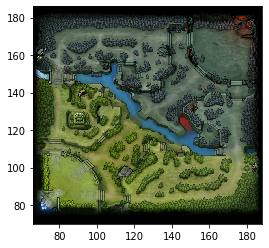

In [12]:
df_obs = pd.read_sql_query("SELECT x_pos x, y_pos y, sum(obs_count) count FROM obs GROUP BY x_pos, y_pos", conn)
df_sen = pd.read_sql_query("SELECT x_pos x, y_pos y, sum(sen_count) count FROM sen GROUP BY x_pos, y_pos", conn)

img = plt.imread("Minimap_pre6.82.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[df_obs['x'].min(), df_obs['x'].max(), df_obs['y'].min(), df_obs['y'].max()])
ax.plot.scatter(df_obs['x'], df_obs['y'], '--', linewidth=5, color='firebrick')

# plt.figure(figsize=(8,8))
# heatmap, xedges, yedges = np.histogram2d(df_obs['x'], df_obs['y'], bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.clf()
# plt.imshow(heatmap.T, extent=extent, origin='lower')
# plt.show()

# df_sen.plot.scatter(x='x', y='y')

# df